# **Proyek Analisis Data: [Brazilian Ecommerce](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)**
- **Nama:** Yunico Ardian Pradana
- **Email:** yunicoardian123@gmail.com
- **ID Dicoding:** yunicoardian123

## **Menentukan Pertanyaan Bisnis**
1. Berapa Persentase dari setiap metode pembayaran yang digunakan ?
2. Kapan waktu puncak belanja di olist ecommerce ?
3. Berapa rata rata waktu pengiriman dari waktu ke waktu ?
4. Bagaimana distribusi pesanaan menggunakan geospatial analysis ?



## **Konteks**
Tujuan analisis ini adalah untuk menyajikan Exploratory Data Analysis (EDA) dari Olist Store, sebuah marketplace yang beroperasi di Brasil . Dataset ini mencakup informasi mendetail tentang pesanan yang dilakukan antara tahun 2016 hingga 2018, meliputi berbagai aspek seperti status pesanan, harga, metode pembayaran, kinerja pengiriman, serta data geolokasi yang mencakup koordinat garis lintang dan bujur. Dataset ini berasal dari data bisnis nyata yang disediakan oleh Olist, dengan beberapa informasi sensitif yang telah dianonimkan.

## **Import Library**

In [1]:
import pandas as pd
import zipfile
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import folium
from folium.plugins import FastMarkerCluster, Fullscreen, MiniMap, HeatMap, HeatMapWithTime, LocateControl

## **Data Wrangling**

### **Gathering Data**

#### **Read Customers**

In [2]:
df_customer = pd.read_csv('datasets/olist_customers_dataset.csv')
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### **Read Geolocation**

In [3]:
df_geolocation = pd.read_csv('datasets/olist_geolocation_dataset.csv')
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### **Read order_items**

In [4]:
df_order_items = pd.read_csv('datasets/olist_order_items_dataset.csv')
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### **Read order_payments**

In [5]:
df_order_payments = pd.read_csv('datasets/olist_order_payments_dataset.csv')
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### **Read order_reviews**

In [6]:
df_order_reviews = pd.read_csv('datasets/olist_order_reviews_dataset.csv')
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### **Read orders_dataset**

In [7]:
df_orders_dataset = pd.read_csv('datasets/olist_orders_dataset.csv')
df_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### **Read product_dataset**

In [8]:
df_products_dataset = pd.read_csv('datasets/olist_products_dataset.csv')
df_products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### **Read sellers_dataset**

In [9]:
df_sellers_dataset = pd.read_csv('datasets/olist_sellers_dataset.csv')
df_sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### **Read product_category**

In [10]:
df_product_name = pd.read_csv('datasets/product_category_name_translation.csv')
df_product_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### **Assesing Data**

In [11]:
# Store dataframes in a list
dataframes = [df_customer, df_geolocation, df_order_items, df_order_payments, df_order_reviews, df_orders_dataset, df_products_dataset, df_sellers_dataset, df_product_name]

for df in dataframes:
    # Get the variable name using globals()
    df_name = [name for name, obj in globals().items() if obj is df][0]
    print(f"\nCustom Info for {df_name} dataframe:")
    print(df.info())


Custom Info for df_customer dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Custom Info for df_geolocation dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng    

Next, we try to see the number of null values in each dataframe

In [12]:
for df in dataframes:
    # Get the variable name using globals()
    df_name = [name for name, obj in globals().items() if obj is df][0]
    
    print(f"\nMissing Values in {df_name} dataframe:")
    print(df.isna().sum())


Missing Values in df_customer dataframe:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Missing Values in df_geolocation dataframe:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Missing Values in df_order_items dataframe:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Missing Values in df_order_payments dataframe:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Missing Values in df_order_reviews dataframe:
review_id                      0
order_id                       0
review_score                   0
re

then we also need to check for duplicates

In [13]:
for df in dataframes:
    # Get the variable name using globals()
    df_name = [name for name, obj in globals().items() if obj is df][0]
    print(f"\nTotal baris duplikat pada {df_name} dataframe: {df.duplicated().sum()}")


Total baris duplikat pada df_customer dataframe: 0

Total baris duplikat pada df_geolocation dataframe: 261831

Total baris duplikat pada df_order_items dataframe: 0

Total baris duplikat pada df_order_payments dataframe: 0

Total baris duplikat pada df_order_reviews dataframe: 0

Total baris duplikat pada df_orders_dataset dataframe: 0

Total baris duplikat pada df_products_dataset dataframe: 0

Total baris duplikat pada df_sellers_dataset dataframe: 0

Total baris duplikat pada df_product_name dataframe: 0


then check the distribution of data in each column

In [14]:
for df in dataframes:
    # Get the variable name using globals()
    df_name = [name for name, obj in globals().items() if obj is df][0]
    
    print(f"\nDistribusi data pada {df_name} :")
    print(df.describe())


Distribusi data pada df_customer :
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

Distribusi data pada df_geolocation :
       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02

Distribusi data

In [15]:
df_orders_dataset.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

### **Cleaning Data**

When we check the duplicates, we can see that there are 261831 duplicates in the df_geolocation dataframe, so it needs further handling by deleting the duplicates.

In [16]:
df_geolocation.drop_duplicates(inplace=True)

after we remove the duplicates, check again to make sure there are no duplicates

In [17]:
df_geolocation.duplicated().sum()

0

next we check for null values in the df_order_reviews dataframe

In [18]:
df_order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

The results above show that the review_comment_title and review_comment_message columns have null values, so the next step is to impute or add the default string values ‘No Tittle’ and ‘No Message’.

In [19]:
df_order_reviews["review_comment_message"].fillna("No Message", inplace=True)
df_order_reviews["review_comment_title"].fillna("No Title", inplace=True)

C:\Users\Legion\AppData\Local\Temp\ipykernel_16224\2844231904.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_order_reviews["review_comment_message"].fillna("No Message", inplace=True)
C:\Users\Legion\AppData\Local\Temp\ipykernel_16224\2844231904.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

When we are assessing the data, there are some columns that should be datetime instead of obj/str. therefore we need to change them to datetime format. some columns that need changes are in the df_orders_dataset, df_order_reviews, and df_order_items datasets.

In [20]:
df_order_items['shipping_limit_date'] = pd.to_datetime(df_order_items['shipping_limit_date'])

In [21]:
orders_column = [
    'order_delivered_carrier_date', 
    'order_delivered_customer_date', 
    'order_estimated_delivery_date', 
    'order_purchase_timestamp', 
    'order_approved_at'
]

for column in orders_column:
    df_orders_dataset[column] = pd.to_datetime(df_orders_dataset[column])

In [22]:
col123 = ['review_creation_date', 'review_answer_timestamp']
df_order_reviews[col123] = df_order_reviews[col123].apply(pd.to_datetime)

### **Merge Dataset**

In [23]:
# Merging Datasets
df_train = df_orders_dataset.merge(df_order_items, on='order_id', how='left')
df_train = df_train.merge(df_order_payments, on='order_id', how='outer', validate='m:m')
df_train = df_train.merge(df_order_reviews, on='order_id', how='outer')
df_train = df_train.merge(df_products_dataset, on='product_id', how='outer')
df_train = df_train.merge(df_customer, on='customer_id', how='outer')
df_train = df_train.merge(df_sellers_dataset, on='seller_id', how='outer')

In [24]:
df_train['day_of_week_name'] = df_train['order_purchase_timestamp'].dt.strftime('%A')
df_train['hour'] = df_train['order_purchase_timestamp'].dt.hour
df_train['year'] = df_train['order_purchase_timestamp'].dt.year
df_train['delivery_time'] = (df_train['order_delivered_customer_date'] - df_train['order_purchase_timestamp']).dt.days #average delivery days
df_train['day_month_year'] = df_train['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')

## **Exploratory Data Analysis (EDA)**

### **1. Berapa persentase dari setiap metode pembayaran yang digunakan ?**

In [25]:
import plotly.express as px

# Calculate payment percentages
payment_counts = df_order_payments['payment_type'].value_counts()
payment_percentages = (payment_counts / payment_counts.sum()) * 100

# Create a bar chart with Plotly
fig = px.bar(
    x=payment_percentages.index,
    y=payment_percentages.values,
    labels={'x': 'Payment Method', 'y': 'Percentage (%)'},
    title='Percentage of Each Payment Method Used',
    color=payment_percentages.index,
    color_continuous_scale='Viridis'
)

# Show the plot
fig.show()

### **2. Kapan waktu puncak belanja di olist ecommerce ?**

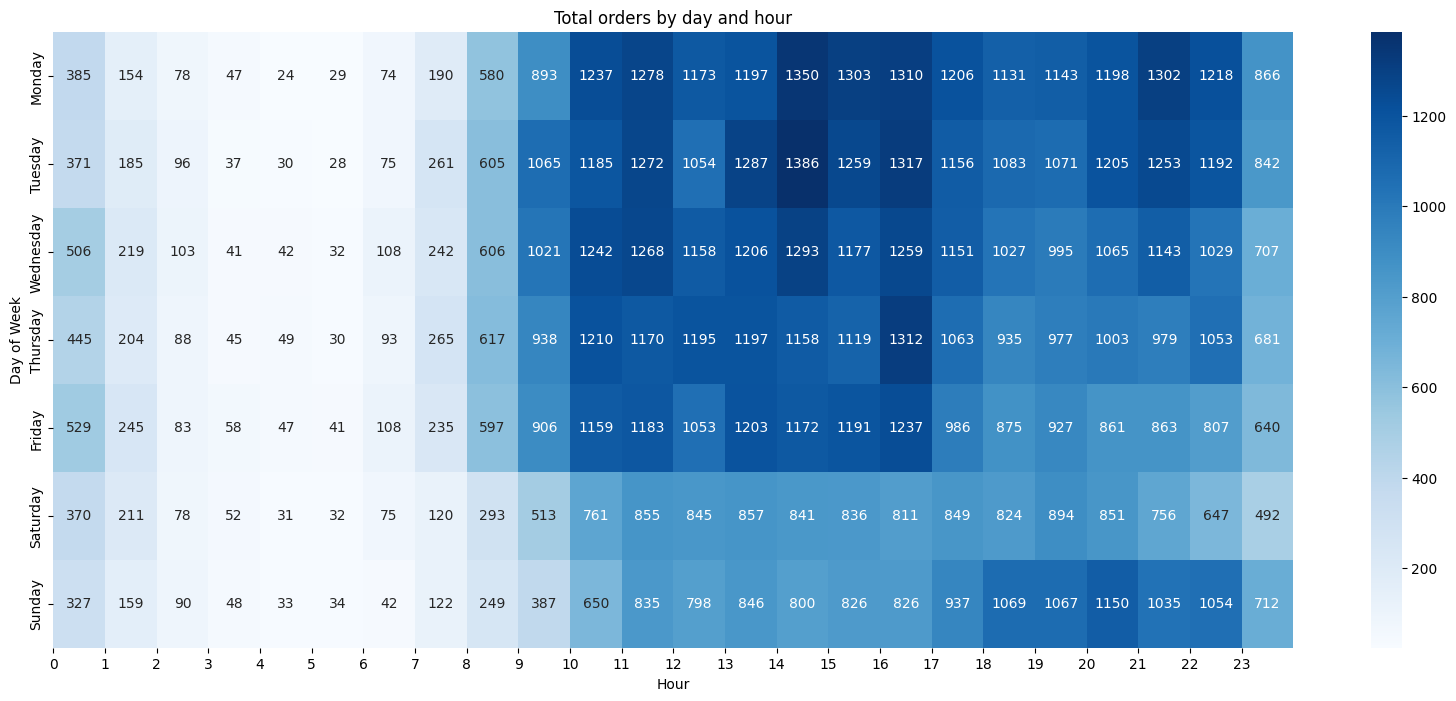

In [26]:
# Create a count table by grouping the data by day of the week and hour
g5 = df_train.groupby(['day_of_week_name', 'hour']).size().reset_index(name='count')

# Create a pivot table to reshape the data for heatmap visualization
tabela_pivot = g5.pivot(index='day_of_week_name', columns='hour', values='count')

# Define the order of the days of the week
g6 = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Reindex the pivot table to ensure the days are in the correct order
tabela_pivot = tabela_pivot.reindex(g6)

# Set up the figure size for the heatmap
plt.figure(figsize=(20, 8))
# Create the heatmap using Seaborn
ax = sns.heatmap(tabela_pivot, cmap="Blues", annot=True, fmt='d', cbar=True)

# Additional settings for the axes
ax.set_xlabel('Hour') 
ax.set_ylabel('Day of Week')
ax.set_title('Total orders by day and hour')  
# Set the x-ticks to show hour labels (0-23)
plt.xticks(ticks=range(24), labels=[str(i) for i in range(24)])

plt.show()

### **3. Berapa rata rata waktu pengiriman dari waktu ke waktu ?**

In [27]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Contoh data (gunakan data asli Anda)
# df_train = pd.read_csv('path_to_your_dataset.csv')

# Konversi kolom 'day_month_year' menjadi tipe datetime
df_train['day_month_year'] = pd.to_datetime(df_train['day_month_year'])

# Group by day_month_year and aggregate data
df_grouped = df_train.groupby('day_month_year').agg(
    total_orders=('order_id', 'count'),
    avg_delivery_time=('delivery_time', 'mean')  # average delivery days
).reset_index()

# Filter data within the date range
start_date = '2017-06-01'
end_date = '2018-06-30'
filtered_df = df_grouped[(df_grouped['day_month_year'] >= start_date) & (df_grouped['day_month_year'] <= end_date)]

# Calculate yearly average
yearly_avg = filtered_df['avg_delivery_time'].mean()

# Create interactive line plot using Plotly
fig = px.line(
    filtered_df,
    x='day_month_year',
    y='avg_delivery_time',
    title='Average Delivery Time Over Time',
    labels={'day_month_year': 'Date', 'avg_delivery_time': 'Days'},
    template='plotly_white'
)

# Add horizontal line for yearly average
fig.add_trace(
    go.Scatter(
        x=filtered_df['day_month_year'],
        y=[yearly_avg] * len(filtered_df),
        mode='lines',
        line=dict(dash='dash', color='red'),
        name='Yearly average'
    )
)

# Update layout for better x-axis formatting
fig.update_layout(
    title=dict(
        text='Average Delivery Time Over Time',
        x=0.5,  # Center title horizontally
        xanchor='center'  # Anchor title in the center
    ),
    xaxis=dict(title='Date', tickangle=45),
    yaxis=dict(title='Average Delivery Time (Days)'),
    legend=dict(title='Legend'),
    margin=dict(t=50, b=50, l=50, r=50)
)

# Show interactive plot
fig.show()

### **4. Bagaimana distribusi pesanaan menggunakan geospatial analysis**

In [28]:
r = requests.get('https://servicodados.ibge.gov.br/api/v1/localidades/mesorregioes')
content = json.loads(r.text)

In [29]:
import requests
import pandas as pd
import json

# Using the API to bring the region to the data
r = requests.get('https://servicodados.ibge.gov.br/api/v1/localidades/mesorregioes')
content = [c['UF'] for c in json.loads(r.text)]
br_info = pd.DataFrame(content)
br_info['nome_regiao'] = br_info['regiao'].apply(lambda x: x['nome'])
br_info.drop(columns=['regiao'], inplace=True)
br_info.drop_duplicates(inplace=True)

# Filtering geolocations outside Brazilian map
geo_prep = df_geolocation[(df_geolocation.geolocation_lat <= 5.27438888) & 
                          (df_geolocation.geolocation_lng >= -73.98283055) & 
                          (df_geolocation.geolocation_lat >= -33.75116944) & 
                          (df_geolocation.geolocation_lng <= -34.79314722)]
geo_group = geo_prep.groupby('geolocation_zip_code_prefix', as_index=False).min()

# Merging all the information
df_train = df_train.merge(br_info, how='left', left_on='customer_state', right_on='sigla')
df_train = df_train.merge(geo_group, how='left', left_on='customer_zip_code_prefix', 
                                        right_on='geolocation_zip_code_prefix')

# Display the first few rows of the merged dataframe
df_train.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,day_month_year,id,sigla,nome,nome_regiao,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,d455a8cb295653b55abda06d434ab492,944b72539d7e1f7f7fc6e46639ef1fe3,delivered,2017-09-26 22:17:05,2017-09-27 22:24:16,2017-09-29 15:53:03,2017-10-07 16:12:47,2017-10-30,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,2017-09-26,41,PR,Paraná,Sul,87502.0,-23.770400,-53.306406,umuarama,PR
1,7f39ba4c9052be115350065d07583cac,d7fc82cbeafea77bd0a8fbbf6296e387,delivered,2017-10-18 08:16:34,2017-10-18 23:56:20,2017-10-20 14:29:01,2017-10-27 16:46:05,2017-11-09,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,2017-10-18,31,MG,Minas Gerais,Sudeste,35490.0,-20.740762,-44.106951,entre rios de minas,MG
2,9dc8d1a6f16f1b89874c29c9d8d30447,d9442164acf4b03109425633efaa0cfc,delivered,2017-10-12 13:33:22,2017-10-12 13:49:22,2017-10-17 15:42:42,2017-10-24 20:17:44,2017-11-06,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,2017-10-12,31,MG,Minas Gerais,Sudeste,38600.0,-17.343891,-46.897290,paracatu,MG
3,0f548bd29148ebc519d6495e37a284e1,015faf9ec36eccd957c0f2782aab09a4,delivered,2017-09-03 08:06:30,2017-09-03 08:25:50,2017-09-04 22:03:06,2017-09-08 16:26:55,2017-09-27,1.0,08574b074924071f4e201e151b152b4e,...,2017-09-03,33,RJ,Rio de Janeiro,Sudeste,24710.0,-22.833832,-43.056561,sao goncalo,RJ
4,0f548bd29148ebc519d6495e37a284e1,015faf9ec36eccd957c0f2782aab09a4,delivered,2017-09-03 08:06:30,2017-09-03 08:25:50,2017-09-04 22:03:06,2017-09-08 16:26:55,2017-09-27,2.0,08574b074924071f4e201e151b152b4e,...,2017-09-03,33,RJ,Rio de Janeiro,Sudeste,24710.0,-22.833832,-43.056561,sao goncalo,RJ


In [30]:
# Zipping locations
lats = list(df_train.query('year == 2018')['geolocation_lat'].dropna().values)[:30000]
longs = list(df_train.query('year == 2018')['geolocation_lng'].dropna().values)[:30000]
locations = list(zip(lats, longs))

# Creating a mapa using folium
map1 = folium.Map(location=[-15, -50], zoom_start=4.0)

# Plugin: FastMarkerCluster
FastMarkerCluster(data=locations).add_to(map1)

map1

## **Conclusion**

1. Berdasarkan visualisasi pada pertanyaan nomor 1, metode pembayaran menggunakan kartu kredit memiliki persentase tertinggi sebesar 73,92%. Hal ini menunjukkan bahwa masyarakat lebih cenderung memilih kartu kredit sebagai metode pembayaran dibandingkan dengan opsi lainnya.

2. Berdasarkan visualisasi pada pertanyaan nomor 2, Waktu puncak belanja di olist ecommerce adalah antara hari Senin dan Jumat, dari pukul 09.00 hingga 18.00 dimana di waktu tersebut merupakan hari kerja

3. Visualisasi pada pertanyaan nomor 3 menunjukkan rata rata pengiriman dari waktu ke waktu. bisa dilihat bahwa rata rata pengiriman bervariasi dari yang tercepat adalah 6 hari di tanggal 25 juni 2018 dan yang paling lama tercatat di tanggal 24 februari 2018 selama 21 hari.

4. Visualisasi pada pertanyaan nomor 4 menunjukkan sebaran pesanan yang banyak tersebar di sebelah timur brazil terutama di kota São Paulo dan Rio de Janeiro 22000+